# Simple Toy Example of Shared WAE 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from util import get_color_2d,grid_2d
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print ("Packages loaded.")

Packages loaded.


### 1. Get Relaxed X, Feasible X, and Feasible Y

In [2]:
x = grid_2d(0,2,0,2,200,100)
# (Optional) added some imbalanced data
x_imb = grid_2d(0,1/4,0,1/4,200,100)

Projection maps from *Relaxed X* to *Feasible X*

$\text{proj}_X: (x_0,x_1) \mapsto (\min(x_0,1),\min(x_1,1))$

In [3]:
def proj_x(x):
    x_proj = np.copy(x)
    x_proj[np.where(x[:,0] > 1)[0],0] = 1.0
    x_proj[np.where(x[:,1] > 1)[0],1] = 1.0
    return x_proj

In [4]:
x_proj = proj_x(x)
c = get_color_2d(x_proj) # compute the color *after* the projection

$\text{mapping: } (x_0,x_1) \mapsto (1.5x_0+0.5x_1, 0.3 \sin(2 \pi x_0)+0.5*x_1+0.75)$

In [5]:
def map_x_to_y(x):
    x0_org = np.copy(x[:,0])
    x1_org = np.copy(x[:,1])
    y = np.copy(x)
    y[:,0] = 1.5*(1-x0_org) + 0.5*x1_org
    y[:,1] = 0.3*np.sin(2*np.pi*(1-x0_org)) + 0.5*x1_org + 0.75
    return y

In [6]:
y = map_x_to_y(x_proj) # mapping with the projected x

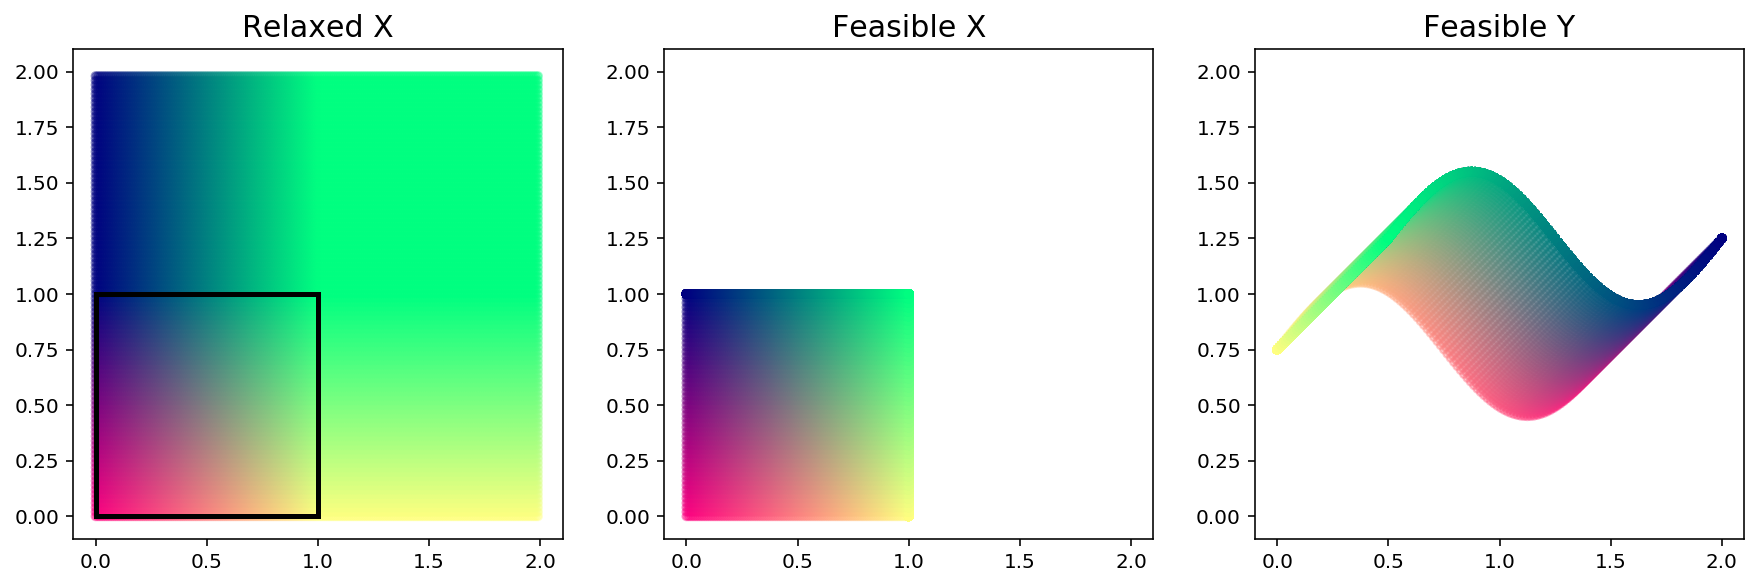

In [7]:
# Plot 
ms,ma,am = 15,0.4,0.1
plt.figure(figsize=(15,4.5))
plt.subplot(131)
plt.scatter(x[:,0],x[:,1],c=c,edgecolors=c,s=ms,marker='o',alpha=ma)
rect = plt.Rectangle(xy=(0,0),width=1,height=1,fill=False,
                     edgecolor='k',linewidth=2.5)
plt.gca().add_patch(rect)
plt.title("Relaxed X",fontsize=15)
plt.axis('square')
plt.axis([0-am,2+am,0-am,2+am])
plt.subplot(132)
plt.scatter(x_proj[:,0],x_proj[:,1],c=c,edgecolors=c,s=ms,marker='o',alpha=ma)
plt.title("Feasible X",fontsize=15)
plt.axis('square')
plt.axis([0-am,2+am,0-am,2+am])
plt.subplot(133)
plt.scatter(y[:,0],y[:,1],c=c,edgecolors=c,s=ms,marker='o',alpha=ma)
plt.title("Feasible Y",fontsize=15)
plt.axis('square')
plt.axis([0-am,2+am,0-am,2+am])
plt.show()

### 2. Compact way

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from util import get_2d_synthetic_data_for_swae,plot_2d_synthetic_data_for_swae
print ("Done.")

Done.


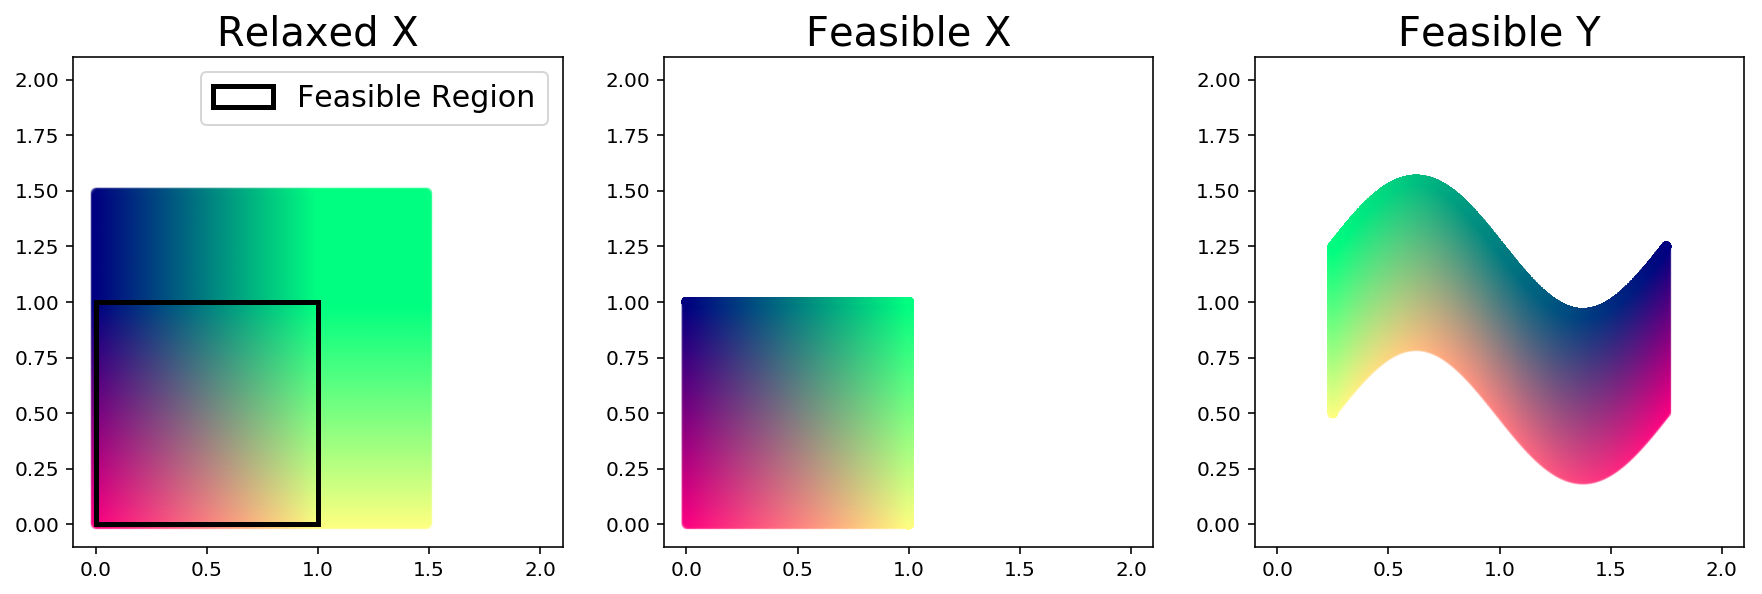

In [9]:
MAKE_IMBALANCE = False
x_relaxed,x_feasible,y_feasible,c = get_2d_synthetic_data_for_swae(
    MAKE_IMBALANCE=MAKE_IMBALANCE)
plot_2d_synthetic_data_for_swae(x_relaxed,x_feasible,y_feasible,c,MAKE_IMBALANCE=MAKE_IMBALANCE)